In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [2]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

In [3]:
train_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
train_data.shape,test_data.shape

((13320, 9), (1480, 9))

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


<AxesSubplot:>

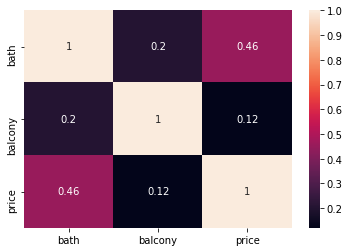

In [8]:
sns.heatmap(train_data.corr(),annot=True)

In [9]:
train_data["data"]="train"
test_data["data"]="test"

In [10]:
full_data=pd.concat([train_data,test_data])
full_data.shape

(14800, 10)

In [11]:
full_data = full_data.reset_index().drop(columns="index")

In [12]:
full_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train
...,...,...,...,...,...,...,...,...,...,...
14795,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN,test
14796,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN,test
14797,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN,test
14798,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN,test


In [13]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14800 non-null  object 
 1   availability  14800 non-null  object 
 2   location      14799 non-null  object 
 3   size          14782 non-null  object 
 4   society       8672 non-null   object 
 5   total_sqft    14800 non-null  object 
 6   bath          14720 non-null  float64
 7   balcony       14122 non-null  float64
 8   price         13320 non-null  float64
 9   data          14800 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [14]:
full_data.isna().sum()

area_type          0
availability       0
location           1
size              18
society         6128
total_sqft         0
bath              80
balcony          678
price           1480
data               0
dtype: int64

In [15]:
for columns in full_data.columns:
    print(full_data[columns].value_counts())

Super built-up  Area    9736
Built-up  Area          2688
Plot  Area              2279
Carpet  Area              97
Name: area_type, dtype: int64
Ready To Move    11743
18-Dec             351
18-May             324
18-Apr             296
18-Aug             225
                 ...  
16-Oct               1
16-Nov               1
15-Jun               1
16-Jan               1
14-Jul               1
Name: availability, Length: 82, dtype: int64
Whitefield                  591
Sarjapur  Road              437
Electronic City             337
Kanakpura Road              298
Thanisandra                 277
                           ... 
EPIP AREA, WHITEFIELD         1
Old Mangammanapalya Road      1
Kalasipalya                   1
Nagarbhavi  BDA Complex       1
Chikkabettahalli              1
Name: location, Length: 1358, dtype: int64
2 BHK         5739
3 BHK         4788
4 Bedroom      918
4 BHK          673
3 Bedroom      613
1 BHK          592
2 Bedroom      368
5 Bedroom      338
6 Bedroom

In [16]:
full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,14720.0,2.698709,1.343932,1.0,2.0,2.0,3.0,40.0
balcony,14122.0,1.582141,0.819147,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [17]:

full_data["bath"]=full_data["bath"].fillna(full_data.bath.median())

In [18]:
full_data.isna().sum()

area_type          0
availability       0
location           1
size              18
society         6128
total_sqft         0
bath               0
balcony          678
price           1480
data               0
dtype: int64

In [19]:

full_data["size"] = full_data["size"].str.split(" ").str[0]
full_data["size"]= pd.to_numeric(full_data["size"])


In [20]:
full_data["size"]=full_data["size"].fillna(full_data["size"].median())


In [21]:
full_data["size"].value_counts()

2.0     6107
3.0     5419
4.0     1591
1.0      729
5.0      399
6.0      243
7.0      113
8.0      102
9.0       67
10.0      17
11.0       4
16.0       2
18.0       1
14.0       1
43.0       1
12.0       1
13.0       1
19.0       1
27.0       1
Name: size, dtype: int64

In [22]:
full_data.isna().sum()

area_type          0
availability       0
location           1
size               0
society         6128
total_sqft         0
bath               0
balcony          678
price           1480
data               0
dtype: int64

In [23]:
full_data["balcony"]=full_data["balcony"].fillna(0)

In [24]:
#a =full_data["location"].value_counts
#type(a)

In [25]:
#full_data["location"]=full_data["location"].apply(lambda x: x.strip())

In [26]:
full_data[full_data["location"].isna()]         

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
568,Super built-up Area,Ready To Move,NaN,3.0,Grare S,1600,3.0,2.0,86.0,train


In [27]:
full_data.dropna(subset = ['location'],inplace=True)

In [28]:
full_data["society"]=full_data["society"].fillna("unknown")

In [29]:
full_data.isna().sum()

area_type          0
availability       0
location           0
size               0
society            0
total_sqft         0
bath               0
balcony            0
price           1480
data               0
dtype: int64

In [30]:
full_data["location"]= full_data["location"].apply(lambda x : x.strip())

In [31]:
location_cnt=full_data["location"].value_counts()


In [32]:
location_cnt_less_than_8=  location_cnt[location_cnt<=8]
location_cnt_less_than_8

Seetharampalya           8
Nallurhalli              8
Hoodi Circle,            8
4th T block Jayanagar    8
Channasandra Layout      8
                        ..
P Krishnappa Layout      1
T K Reddy Layout         1
Maruthi HBCS Layout      1
EPIP AREA, WHITEFIELD    1
Chikkabettahalli         1
Name: location, Length: 1044, dtype: int64

In [33]:
full_data["location"]=full_data["location"].apply(lambda x : 'other' if x in location_cnt_less_than_8 else x )

In [34]:
full_data["location"].value_counts()

other                2637
Whitefield            592
Sarjapur  Road        437
Electronic City       339
Kanakpura Road        299
                     ... 
Roopena Agrahara        9
Dollars Colony          9
Jakkur Plantation       9
Banagiri Nagar          9
Sunkadakatte            9
Name: location, Length: 302, dtype: int64

In [35]:
full_data["availability"].value_counts()      

Ready To Move    11742
18-Dec             351
18-May             324
18-Apr             296
18-Aug             225
                 ...  
16-Oct               1
16-Nov               1
15-Jun               1
16-Jan               1
14-Jul               1
Name: availability, Length: 82, dtype: int64

In [36]:
#full_data[full_data["availability"] != 'Ready To Move' && full_data["availability"] != 'Immediate Possession' ]
#full_data[ ]
full_data.query("availability != 'Ready To Move' and availability != 'Immediate Possession'")["availability"]

0        19-Dec
6        18-May
10       18-Feb
21       19-Dec
24       18-Nov
          ...  
14775    18-Feb
14782    18-Dec
14784    18-Dec
14792    18-Aug
14798    18-Feb
Name: availability, Length: 3039, dtype: object

In [37]:
#gm.loc[(gm['employrate'] <55) & (gm['employrate'] > 50),'employrate']=11
full_data.loc[(full_data['availability'] != 'Ready To Move') & (full_data['availability']  != 'Immediate Possession'),'availability']='Not Ready To Move'

In [38]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [39]:
# import re
# def convert_sqft_to_num(x):
#     tokens = x.split('-')
#     if len(tokens) == 2:
#         return (float(tokens[0])+float(tokens[1]))/2
#     elif x.find("Meter") != -1 :
#     #elif x.str.contains("Sq").any():
#         return(float(re.findall('\d*\.?\d+',x)) * 10.76391042)
#     try:    
#         return float(x)
#     except:
#         return None

In [40]:
full_data.total_sqft = full_data.total_sqft.apply(convert_sqft_to_num)

In [41]:
full_data.total_sqft.isna().sum()

48

In [42]:
full_data[full_data["total_sqft"].isna() ]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
410,Super built-up Area,Ready To Move,Kengeri,1.0,unknown,NaN,1.0,0.0,18.50,train
648,Built-up Area,Ready To Move,Arekere,9.0,unknown,NaN,9.0,0.0,265.00,train
775,Built-up Area,Ready To Move,other,1.0,unknown,NaN,2.0,1.0,93.00,train
872,Super built-up Area,Ready To Move,other,2.0,unknown,NaN,2.0,0.0,45.00,train
1019,Plot Area,Not Ready To Move,other,1.0,unknown,NaN,1.0,0.0,110.00,train
1086,Plot Area,Not Ready To Move,other,2.0,unknown,NaN,2.0,2.0,29.50,train
1400,Super built-up Area,Ready To Move,Chamrajpet,9.0,unknown,NaN,9.0,1.0,296.00,train
1712,Plot Area,Ready To Move,other,3.0,CoiewSy,NaN,3.0,1.0,95.00,train
1743,Super built-up Area,Not Ready To Move,Hosa Road,3.0,Sosisic,NaN,3.0,1.0,115.00,train
1821,Plot Area,Ready To Move,Sarjapur,3.0,Inensba,NaN,3.0,1.0,76.00,train


In [43]:
#full_data["total_sqft"]=
#full_data[full_data["total_sqft"].isna() & full_data["data"]=="train"]
#.fillna("unknown")

full_data.loc[(full_data['total_sqft'].isna()) & (full_data['data']  == 'test'),'total_sqft']=0

In [44]:
full_data[full_data["total_sqft"].isna() ]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
410,Super built-up Area,Ready To Move,Kengeri,1.0,unknown,NaN,1.0,0.0,18.50,train
648,Built-up Area,Ready To Move,Arekere,9.0,unknown,NaN,9.0,0.0,265.00,train
775,Built-up Area,Ready To Move,other,1.0,unknown,NaN,2.0,1.0,93.00,train
872,Super built-up Area,Ready To Move,other,2.0,unknown,NaN,2.0,0.0,45.00,train
1019,Plot Area,Not Ready To Move,other,1.0,unknown,NaN,1.0,0.0,110.00,train
1086,Plot Area,Not Ready To Move,other,2.0,unknown,NaN,2.0,2.0,29.50,train
1400,Super built-up Area,Ready To Move,Chamrajpet,9.0,unknown,NaN,9.0,1.0,296.00,train
1712,Plot Area,Ready To Move,other,3.0,CoiewSy,NaN,3.0,1.0,95.00,train
1743,Super built-up Area,Not Ready To Move,Hosa Road,3.0,Sosisic,NaN,3.0,1.0,115.00,train
1821,Plot Area,Ready To Move,Sarjapur,3.0,Inensba,NaN,3.0,1.0,76.00,train


In [45]:
full_data.dropna(subset = ['total_sqft'],inplace=True)

In [46]:
full_data.shape

(14753, 10)

In [47]:
del full_data['availability']

In [48]:
full_data = full_data.reset_index().drop(columns="index")

In [49]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14753 entries, 0 to 14752
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   14753 non-null  object 
 1   location    14753 non-null  object 
 2   size        14753 non-null  float64
 3   society     14753 non-null  object 
 4   total_sqft  14753 non-null  float64
 5   bath        14753 non-null  float64
 6   balcony     14753 non-null  float64
 7   price       13273 non-null  float64
 8   data        14753 non-null  object 
dtypes: float64(5), object(4)
memory usage: 1.0+ MB


In [50]:
category_data_columns = full_data.select_dtypes(exclude = np.number).drop(columns=["data","society"]).columns

In [51]:
numeric_data_columns = full_data.select_dtypes(include = np.number).drop(columns = "price").columns

In [52]:
preprocess_category_data_columns = pd.get_dummies(full_data[category_data_columns])
scaler = StandardScaler()

In [53]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(full_data[numeric_data_columns]), columns=numeric_data_columns)

In [54]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, full_data[["data", "price"]]], axis = 1)

In [55]:
final_preprocessed.shape

(14753, 312)

In [56]:
train_df=final_preprocessed[final_preprocessed["data"]=="train"]
test_df=final_preprocessed[final_preprocessed["data"]=="test"]

In [57]:
train_X = train_df.drop(columns=[ "price","data"])
train_y = np.log1p(train_df['price'])
test_X = test_df.drop(columns=["price","data"])

In [58]:
sample_submission = pd.read_csv("Test.csv")
def model_fit(model, train_X, train_y, test_X, filename):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train RMSE : ",mean_squared_error(np.log1p(train_y), np.log1p(train_pred), squared=False))
    #print(type(test_pred))
    sample_submission['price'] = np.abs(np.expm1(test_pred))
    sample_submission.to_csv(filename, index = False)
    return  sample_submission

In [59]:
linear_model = LinearRegression()
linear_res = model_fit(linear_model, train_X, train_y, test_X,  "linear_regression.csv" )
sample_submission.info()

Train RMSE :  0.07108492273536149
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         1480 non-null   float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [60]:
model = Ridge(alpha=0.5)
linear_res = model_fit(model, train_X, train_y, test_X,  "Ridge.csv" )

Train RMSE :  0.07092469738294696


In [61]:
model = Lasso(alpha=0.5)
linear_res = model_fit(model, train_X, train_y, test_X,  "Lasso.csv" )

Train RMSE :  0.12799518964668632


In [62]:
model = ElasticNet(alpha=0.5)
linear_res = model_fit(model, train_X, train_y, test_X, "elastic_net.csv" )

Train RMSE :  0.1078019311965491


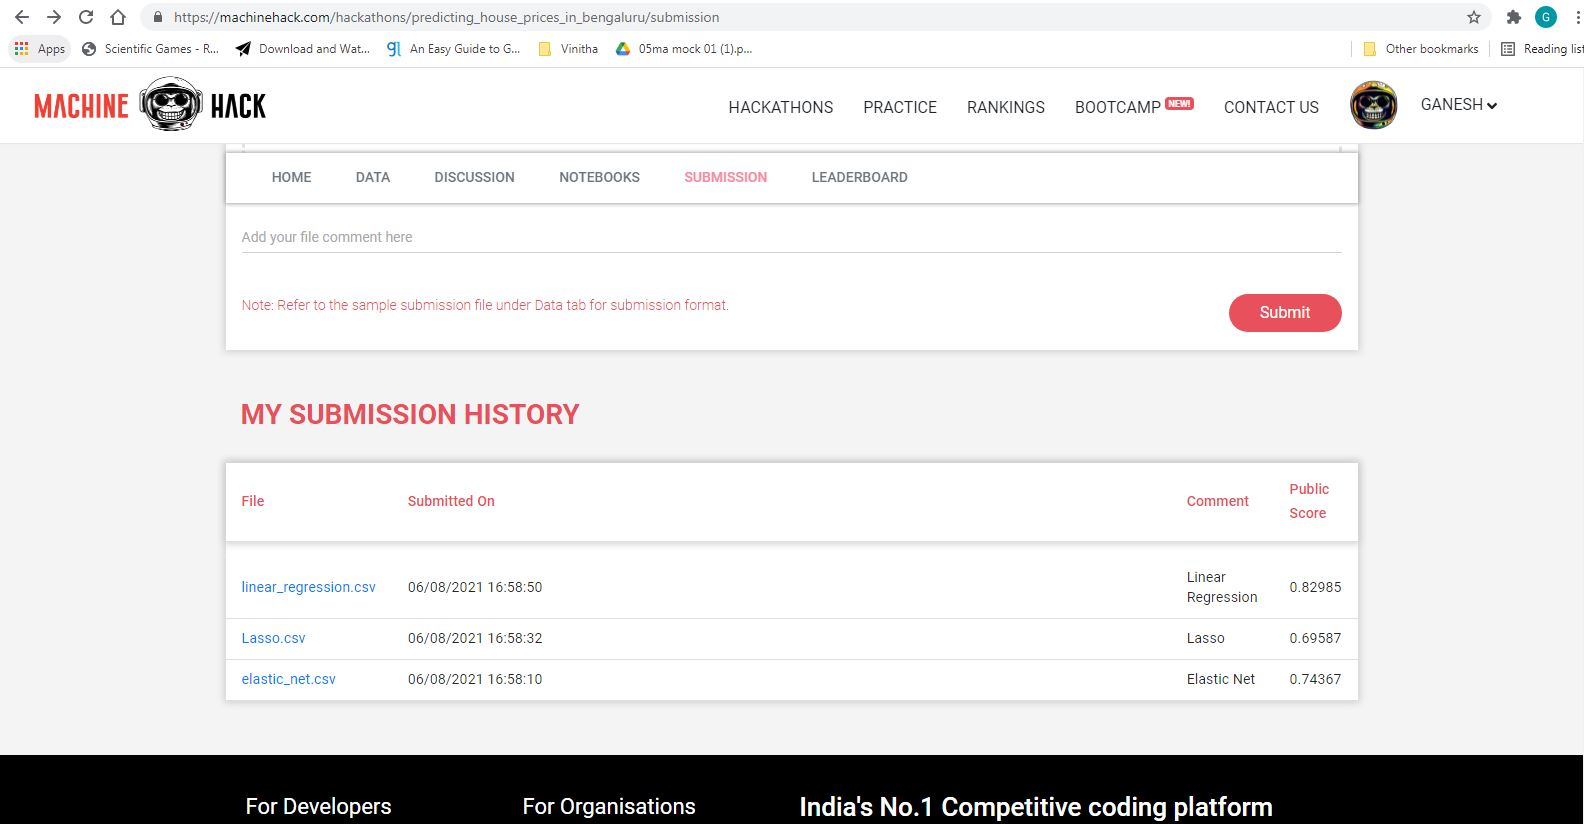

In [63]:
from IPython.display import Image
Image(filename='Score.JPG')

In [64]:
def model_fitt(model, train_X, train_y, test_X, sample_test, filename):
    model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
    print("Train RMSE : ",mean_squared_error(np.log1p(train_y), np.log1p(train_pred), squared=False))
    test_pred = model.predict(test_X)
    #print(type(test_pred))
    sample_test['price'] = np.abs(np.expm1(test_pred)).astype('float')
    sample_test.to_csv(filename, index = False)
    return mean_squared_error(np.log1p(train_y), np.log1p(train_pred), squared=False),sample_test
     

In [65]:
model = KNeighborsRegressor()
KNN = model_fitt(model, train_X, train_y, test_X,sample_submission, "knn_default.csv" )


Train RMSE :  0.05014562148778085


In [66]:
res = []
for i in range(1,25):
    model = KNeighborsRegressor(n_neighbors=i)
    print(i)
    err = model_fitt(model, train_X, train_y, test_X, sample_submission, str(i)+"KNN.csv")
    res.append(err)

1
Train RMSE :  0.02024669706226537
2
Train RMSE :  0.038421607503937
3
Train RMSE :  0.04449143957372283
4
Train RMSE :  0.04817824162216413
5
Train RMSE :  0.05014562148778085
6
Train RMSE :  0.05170129788332417
7
Train RMSE :  0.052973339980557685
8
Train RMSE :  0.05397746264842216
9
Train RMSE :  0.05493245004990641
10
Train RMSE :  0.055630100259921295
11
Train RMSE :  0.05623849241995495
12
Train RMSE :  0.056800154868630444
13
Train RMSE :  0.05718213347975291
14
Train RMSE :  0.0577084178890128
15
Train RMSE :  0.05823070261348691
16
Train RMSE :  0.058557562446723124
17
Train RMSE :  0.05879112616166247
18
Train RMSE :  0.05908515985505895
19
Train RMSE :  0.05934260777979722
20
Train RMSE :  0.05955047591406807
21
Train RMSE :  0.05979399959600517
22
Train RMSE :  0.06003741841122781
23
Train RMSE :  0.060206460091063396
24
Train RMSE :  0.060390849901710224
